# 波士顿房价
13个数据和1个价格

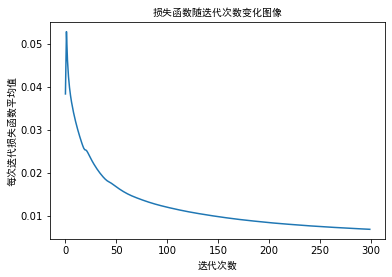

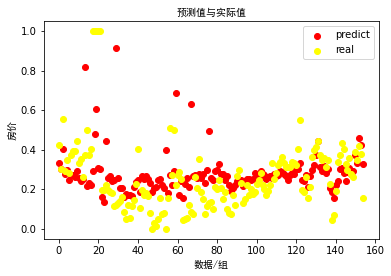

odict_keys(['0.weight', '0.bias', '2.weight', '2.bias'])


In [9]:
import numpy as np
from matplotlib.font_manager import FontProperties
import torch
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

# 1-1 加载数据
boston = load_boston()
# 1-2 数据归一化
ss_input = MinMaxScaler()
ss_output = MinMaxScaler()
data_set_input = ss_input.fit_transform(boston['data'])
data_set_output = ss_output.fit_transform(boston['target'][:, np.newaxis])
# 1-3 划分数据集
train_set_input = data_set_input[0:350, :]
train_set_output = data_set_output[0:350, :]
test_set_input = data_set_input[351:506, :]
test_set_output = data_set_output[351:506, :]

# 2 构建网络
net = nn.Sequential(
    nn.Linear(13, 14),
    nn.ReLU(),
    nn.Linear(14, 1),
    nn.Sigmoid(),
)

# 3 定义优化器和损失函数
cost = nn.MSELoss()
optimizer = torch.optim.RMSprop(net.parameters(), lr=0.01)

# 4 训练网络
max_epoch = 300
iter_loss = []
batch_loss = []
for i in range(max_epoch):
    optimizer.zero_grad()
    for n in range(train_set_input.shape[0]):
        input = Variable(torch.FloatTensor(train_set_input[n, :]))
        output = Variable(torch.FloatTensor(train_set_output[n, :]))

        predict = net(input)
        loss = cost(predict, output)
        batch_loss.append(loss.data.numpy())
        loss.backward()

    optimizer.step()
    iter_loss.append(np.average(np.array(batch_loss)))

#5 测试网络效果
predict_ass = []
for i in range(test_set_input.shape[0]):
    input = Variable(torch.FloatTensor(test_set_input[i, :]))
    predict_ass.append(net(input))

# 图1
x = np.arange(max_epoch)
y = np.array(iter_loss)
myfont = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')
plt.plot(x, y)
plt.title('损失函数随迭代次数变化图像', fontproperties=myfont)
plt.xlabel('迭代次数', fontproperties=myfont)
plt.ylabel('每次迭代损失函数平均值', fontproperties=myfont)
plt.show()

#图2
x = np.arange(test_set_input.shape[0])
y1 = np.array(predict_ass)
y2 = np.array(test_set_output)
myfont = FontProperties(fname='C:/Windows/Fonts/simhei.ttf')
line1 = plt.scatter(x, y1, c='red')
line2 = plt.scatter(x, y2, c='yellow')
plt.legend([line1, line2], ["predict", "real"], loc=1)
plt.title('预测值与实际值', fontproperties=myfont)
plt.xlabel('数据/组', fontproperties=myfont)
plt.ylabel('房价', fontproperties=myfont)
plt.show()

#ps 查看权重
print(net.state_dict().keys())

In [10]:
net

Sequential(
  (0): Linear(in_features=13, out_features=14, bias=True)
  (1): ReLU()
  (2): Linear(in_features=14, out_features=1, bias=True)
  (3): Sigmoid()
)

# 盏尾花分类
4个维度，三个分类

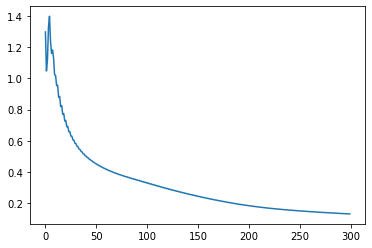

In [14]:
from sklearn.datasets import load_iris
import numpy as np
import torch
from sklearn.preprocessing import MinMaxScaler
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

iris=load_iris()
input =torch.FloatTensor(iris['data'])
label=torch.LongTensor(iris['target'])
net=nn.Sequential(
    nn.Linear(4,20),
    nn.Linear(20,3),
)
optimizer=torch.optim.SGD(net.parameters(),lr=0.05)
cost=nn.CrossEntropyLoss()
epoch=300
iter_loss=[]
for i in range(epoch):
    optimizer.zero_grad()
    predict=net(input)
    loss=cost(predict,label)
    iter_loss.append(loss.data.numpy())
    loss.backward()
    optimizer.step()
x=np.arange(epoch)
y=np.array(iter_loss)
plt.plot(x,y)
plt.show()

In [25]:
out1 = net(input)
#返回预测每个花的概率最大值索引
prediction = torch.max(out1, 1)[1]
predict_y = prediction.numpy()
target_y = label.data.numpy()
gailv=sum((target_y==predict_y)==True)/prediction.shape[0]

In [26]:
gailv

0.9733333333333334